### ch05_Deep_Encoder_MLP_mnist

In [1]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

In [11]:
def build_DAE_model(train_data):
    inputs = Input(shape=(train_data.shape[1],))
    encoded = Dense(128, activation="relu")(inputs)
    encoded = Dense(64, activation="relu")(encoded)
    encoded = Dense(32, activation="relu")(encoded)
    encoded = Dense(64, activation="relu")(encoded)
    encoded = Dense(128, activation="relu")(encoded)
    outputs = Dense(train_data.shape[1], activation="relu")(encoded)
    
    model = Model(inputs, outputs)
    model.compile(loss="binary_crossentropy", optimizer="adadelta")
    return model

def preprocess_mnist_data(train_data, test_data):
    train_data = train_data.astype("float32") / 255
    test_data = test_data.astype("float32") / 255
    train_data = train_data.reshape((train_data.shape[0], np.prod(train_data.shape[1:])))
    test_data = test_data.reshape((test_data.shape[0], np.prod(test_data.shape[1:])))
    return train_data, test_data

def train_model(model, train_data, test_data, epochs):
    history = model.fit(train_data, train_data, epochs=epochs, batch_size=128,
              shuffle=True, validation_data=(test_data,test_data))
    return history

def visual_train_status(history):
    print(history.history.keys())
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
#     acc = history.history["accuracy"]
#     val_acc = history.history["val_accuracy"]
    epochs = range(1, len(loss)+1)
    
    plt.figure(figsize=(12,3))
#     plt.subplot(121)
    plt.plot(epochs, loss, "bo-", label="Training Loss")
    plt.plot(epochs, val_loss, "ro--", label="Validation Loss")
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epochs')
    plt.legend()    
#     plt.subplot(122)
#     plt.plot(epochs, acc, "bo-", label="Training Acc")
#     plt.plot(epochs, val_acc, "ro--", label="Validation Acc")
#     plt.title('model accuracy')
#     plt.ylabel('accuracy')
#     plt.xlabel('epochs')
#     plt.legend()
    plt.show()

In [12]:
(train_data, _), (test_data, _) = mnist.load_data()
train_data, test_data = preprocess_mnist_data(train_data, test_data)

model = build_DAE_model(train_data)

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 3s 50us/sample - loss: 1.2431 - val_loss: 1.2519
Epoch 2/3
60000/60000 [==============================] - 2s 40us/sample - loss: 1.2267 - val_loss: 1.2360
Epoch 3/3
60000/60000 [==============================] - 3s 43us/sample - loss: 1.2111 - val_loss: 1.2201


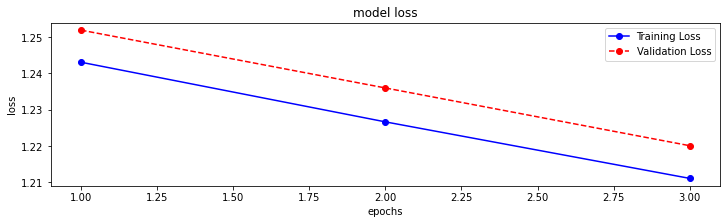

In [13]:
history = train_model(model, train_data, test_data, epochs=3)
visual_train_status(history)

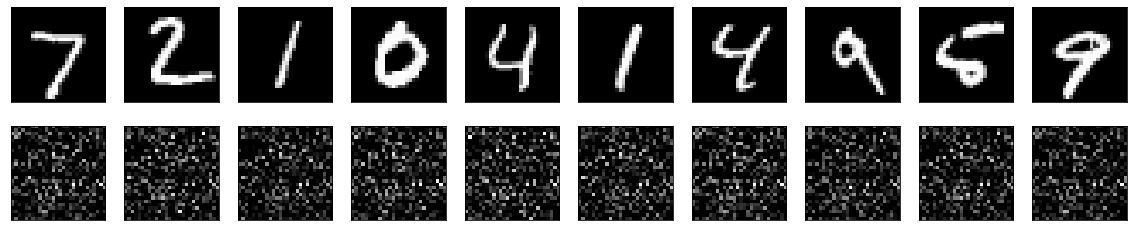

In [14]:
decoded_imgs = model.predict(test_data)
n = 10  #輸出10個數字
plt.figure(figsize=(20, 4))
for i in range(n):
    #輸出原本的圖片
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(test_data[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    #輸出模型結果圖片
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## Deep MLP

In [6]:
from tensorflow import keras
from tensorflow.keras import datasets, layers, models

inputs = keras.Input(shape=(28,28), name="inputs")
d = layers.Flatten()(inputs)
d = layers.Dense(units=512, activation="relu", name='Hidden_layer1')(d)
d = layers.Dropout(rate=0.3)(d)
d = layers.Dense(units=512, activation="relu", name='Hidden_layer2')(d)
d = layers.Dropout(rate=0.3)(d)
d = layers.Dense(units=512, activation="relu", name='Hidden_layer3')(d)
d = layers.Dropout(rate=0.3)(d)
d = layers.Dense(units=512, activation="relu", name='Hidden_layer4')(d)
d = layers.Dropout(rate=0.3)(d)
outputs = layers.Dense(units=10, activation='softmax', name="outputs")(d)

model = models.Model(inputs, outputs)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          [(None, 28, 28)]          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
Hidden_layer1 (Dense)        (None, 512)               401920    
_________________________________________________________________
dropout_16 (Dropout)         (None, 512)               0         
_________________________________________________________________
Hidden_layer2 (Dense)        (None, 512)               262656    
_________________________________________________________________
dropout_17 (Dropout)         (None, 512)               0         
_________________________________________________________________
Hidden_layer3 (Dense)        (None, 512)               262656

In [36]:
from tensorflow.keras import utils

(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()# 分割訓練集資料與測試集資料
num_x_train = int(len(x_train) // 10)
num_x_test = int(len(x_test) // 10)
x_train, y_train = x_train[:num_x_train], y_train[:num_x_train]
x_test, y_test = x_test[:num_x_test], y_test[:num_x_test]
y_train = utils.to_categorical(y_train)
y_test = utils.to_categorical(y_test)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

x_train shape: (6000, 28, 28)
x_test shape: (1000, 28, 28)


In [11]:
batch_size = 128

history=model.fit(x_train, y_train, batch_size=batch_size, epochs=6, validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test, batch_size=batch_size,verbose=0)
print('Test score:', score)
print('Test accuracy:', acc)

Train on 6000 samples, validate on 1000 samples
Epoch 1/6
6000/6000 [==============================] - 2s 295us/sample - loss: 13.8002 - accuracy: 0.4405 - val_loss: 0.7857 - val_accuracy: 0.7880
Epoch 2/6
6000/6000 [==============================] - 1s 150us/sample - loss: 1.6509 - accuracy: 0.6728 - val_loss: 0.5337 - val_accuracy: 0.8440
Epoch 3/6
6000/6000 [==============================] - 1s 158us/sample - loss: 1.0610 - accuracy: 0.7372 - val_loss: 0.4752 - val_accuracy: 0.8670
Epoch 4/6
6000/6000 [==============================] - 1s 144us/sample - loss: 0.7961 - accuracy: 0.7900 - val_loss: 0.4407 - val_accuracy: 0.8720
Epoch 5/6
6000/6000 [==============================] - 1s 155us/sample - loss: 0.6661 - accuracy: 0.8175 - val_loss: 0.4138 - val_accuracy: 0.8810
Epoch 6/6
6000/6000 [==============================] - 1s 175us/sample - loss: 0.5497 - accuracy: 0.8432 - val_loss: 0.3790 - val_accuracy: 0.8900
Test score: 0.3790012059211731
Test accuracy: 0.89


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


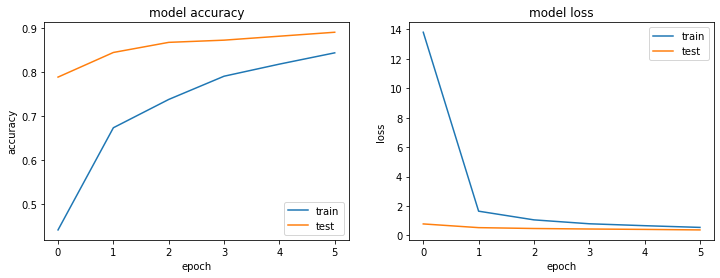

In [13]:
print(history.history.keys())

import matplotlib.pyplot as plt
def visual_train_state(history):
    plt.figure(figsize=(12,4))
    plt.subplot(121)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='best')
            
    plt.subplot(122)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='best')
    plt.show()
    
visual_train_state(history)

labels ['7', '2', '1', '0', '4', '1', '4', '9', '5', '9']
preds  ['7', '2', '1', '0', '4', '1', '4', '9', '2', '9']


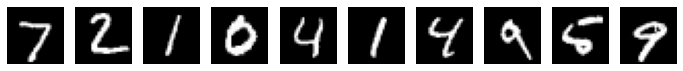

In [37]:
import numpy as np
index = 0
test_data = x_test[index:index+10]
labels = y_test[index:index+10]
labels = np.argmax(labels, axis=1)
preds = model.predict(test_data)
preds = np.argmax(preds, axis=1)
print("labels",[str(label) for label in labels])
print("preds ",[str(pred) for pred in preds])

plt.figure(figsize=(12,3))
for i in range(10):
    plt.subplot(1,10,(i+1))
    plt.imshow(test_data[i], cmap="gray")
    plt.axis("off")
plt.show()